# Import libraries

In [1]:
#Shared
%matplotlib inline
import tensorflow as tf
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import timeit
from keras.utils import np_utils
from __future__ import print_function
from __future__ import absolute_import
import keras
import keras.backend as K
from keras.models import Sequential, Model
from keras.layers import *
from keras.activations import softmax
import zipfile
import numpy as np
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from scipy import ndimage
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
from sklearn.model_selection import GridSearchCV as GS
from scipy import misc
from sklearn.model_selection import train_test_split

config = tf.ConfigProto()
config.gpu_options.allow_growth = True

Using TensorFlow backend.


# Import data

In [14]:
#!curl -o data.zip https://storage.googleapis.com/image-data-recognition/data/data.zip 

In [15]:
zf= zipfile.ZipFile('data.zip','r')
zf.extractall()

In [16]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [17]:
train_y_total=train['label']
train_x_total=train.drop(['label'],1)
test_x=test.copy()

In [18]:
#One-hot encode labels
train_y_total = np_utils.to_categorical(train_y_total, 10)

## Division of data into training and validation

In [19]:
train_x, valid_x, train_y, valid_y = train_test_split(train_x_total, train_y_total, test_size=0.2)
print (train_x.shape, train_y.shape)
print (valid_x.shape, valid_y.shape)

(33600, 784) (33600, 10)
(8400, 784) (8400, 10)


In [20]:
#Transform dataframes into numpy arrays
train_x_array=train_x.values
train_y_array=train_y.copy()
valid_x_array=valid_x.values
valid_y_array=valid_y.copy()
test_x_array=test_x.values

train_x_total_array=train_x_total.values
train_y_total_array=train_y_total.copy()


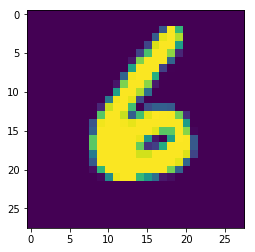

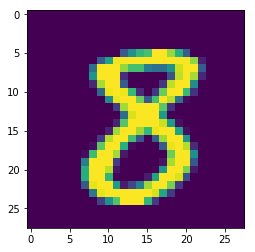

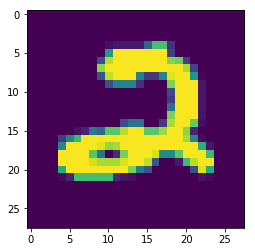

In [21]:
#Reshape data into 28x28
train_x_array_reshaped=train_x_array.reshape((train_x_array.shape[0],28,28,1))
valid_x_array_reshaped=valid_x_array.reshape((valid_x_array.shape[0],28,28,1))
test_x_array_reshaped=test_x_array.reshape((test_x_array.shape[0],28,28,1))
train_x_total_array_reshaped=train_x_total_array.reshape((train_x_total_array.shape[0],28,28,1))
plt.imshow(train_x_array_reshaped[0,:,:,0])
plt.show()
plt.imshow(valid_x_array_reshaped[0,:,:,0])
plt.show()
plt.imshow(test_x_array_reshaped[0,:,:,0])
plt.show()

# Definition of the model

In [22]:
#Creation of a model
def CNN(dropout_rate=0.0,activation='relu',density=128,lr=0.001,first_conv=64,second_conv=32,third_conv=32):
  print(dropout_rate, density,first_conv ,second_conv,third_conv)
  model = Sequential()
  model.add(Conv2D(first_conv, kernel_size=(3, 3),
                 activation=activation,
                 input_shape=(28,28,1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(second_conv, (2, 2), activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(dropout_rate))
  model.add(Conv2D(third_conv, (3, 3), activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(density, activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(10, activation='softmax'))
  model.summary()
#Compilation of the model
  model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizers.Adam(lr=lr),
              metrics=['accuracy'])
  return model

In [31]:
#Model initialization
np.random.seed(99)
model = KerasClassifier(build_fn=CNN,epochs=30,batch_size=128,dropout_rate=0.3,density=1024,first_conv=64,second_conv=16,third_conv=32)

# Grid search over parameters

In [ ]:
#Joseph
#Gridsearch parameters
parameters = {
            'dropout_rate':(0,0.2,0.3,0.4,0.5),
           # 'epochs' :(10,20,30),
            #'batch_size':(128,256,512,1024),
            'density': (64,124),
            #'first_conv':(32,64),
            #'second_conv':(16,32,64),
            #'third_conv':(16,32,64)
             }

gs = GS(estimator=model, param_grid=parameters,verbose=True)
gs.fit(train_x_total_array_reshaped, train_y_total)


# Training

In [32]:
#Training using the gridsearch wrapper without data augmentation
history =model.fit(train_x_array_reshaped/255, train_y_array,
          verbose=1,
          validation_data=(valid_x_array_reshaped/255, valid_y_array))

0.3 1024 64 16 32
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 16)        4112      
_________________________________________________________________
batch_normalization_14 (Batc (None, 12, 12, 16)        64        
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 6, 6, 16)          0  

In [34]:
model.fit(train_x_total_array_reshaped, train_y_total_array,
          verbose=1)

0.3 1024 64 16 32
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_16 (Batc (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 16)        4112      
_________________________________________________________________
batch_normalization_17 (Batc (None, 12, 12, 16)        64        
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 6, 6, 16)          0  

In [35]:
#Training using data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.15, # Randomly zoom image 
        width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(train_x_array_reshaped)

model=CNN(dropout_rate=0.3,density=1024,first_conv=64,second_conv=16,third_conv=32)
history= model.fit_generator(datagen.flow(train_x_total_array_reshaped, train_y_total_array,batch_size=1024),
            epochs = 30,  
           #validation_data=(valid_x_array_reshaped, valid_y_array),
            verbose = 1,
           )

0.3 1024 64 16 32
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_19 (Batc (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 12, 12, 16)        4112      
_________________________________________________________________
batch_normalization_20 (Batc (None, 12, 12, 16)        64        
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 6, 6, 16)          0  

# Visualize validation and training error

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


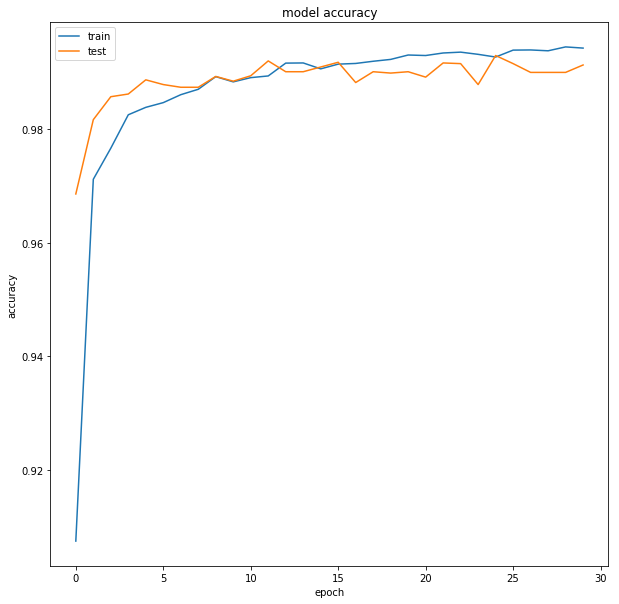

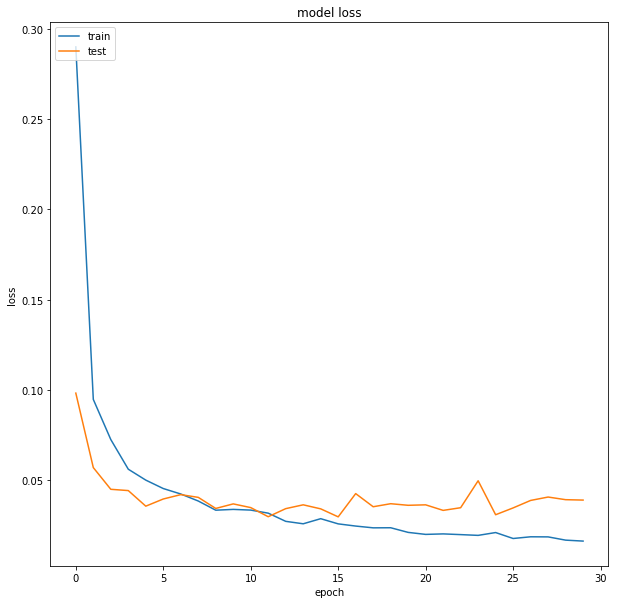

In [33]:
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 10



print(history.history.keys())
#summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Prediction

In [36]:
values = model.predict(test_x_array_reshaped)
reverse_encoding = pd.DataFrame(values).idxmax(axis=1)

In [37]:
values[0:3]

array([[  6.96017910e-09,   1.85436932e-09,   9.99997497e-01,
          5.05466403e-07,   3.37304229e-09,   7.98646127e-09,
          1.30117347e-12,   1.93383289e-06,   2.61832049e-08,
          1.07369459e-07],
       [  9.99794662e-01,   4.19894732e-08,   2.40524114e-05,
          4.38918676e-07,   6.36282721e-06,   2.68072890e-05,
          2.05291963e-05,   4.58710929e-06,   8.96961046e-06,
          1.13716749e-04],
       [  6.73433874e-07,   1.72585771e-06,   1.60109092e-04,
          3.68276560e-05,   2.14126823e-03,   5.64195989e-06,
          3.98228053e-07,   4.43912391e-03,   3.11542244e-05,
          9.93183076e-01]], dtype=float32)

In [39]:
n_points = values.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = np.arange(test_x.shape[0])+1
y_pred_pp[:, 1] = reverse_encoding #you migh want to replace values with reverse_encoding or vice versa
np.savetxt('cnn.csv', y_pred_pp, fmt='%d', delimiter=',',header="ImageId,Label",comments='')